# Smoothing for Linear Gaussian System

So here, we will solve smoothing problem by using Kalman filter and Kalman filter in reverse time for Linear Gaussian System

$\begin{equation}
 \begin{cases}
   X_t = a_t X_{t-1} + c_t + b_t V_t, t \in N, X_0 \sim N(m_0, D_0)\\
   Y_t = A_t X_t + C_t + B_t W_t \\
   Y_0 = A_0 X_0 + C_0 + B_0 W_0
 \end{cases}
\end{equation}$

$Y$ - observing value, have to smooth $X$

$\hat X_t$ - estimation by classic Kalman filter

$\hat X_t^r$ - estimation by reverse Kalman filter

We will search for 

$\hat X_t^s = E[X_t | Y_T]$ - smoothing by observations on time $T$

$K_t^s = cov(X_t^s - X_t, X_t^s - X_t)$ - covariance matrix of smoothing error

Fortunately, we have simple formula to calculate it

$\hat X_t^s = K_t^s (K_t^{-1} \hat X_t + {(K_t^r)}^{-1} \hat X_t^r )$

$K_t^s = {(K_t^{-1} + {(K_t^r)}^{-1} - k_t^{-1})}^{-1}$


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import math
from tqdm.notebook import tqdm
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 1
%aimport classes.LinearGaussSystem

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
a = 1
b = 0.5
c = 0
A = 2
B = 1
C = 0.5
p_0 = ss.norm(loc = 0, scale = 1)
p_v = ss.norm(loc = 0, scale = 1)
p_w = ss.norm(loc = 0, scale = 1)

LGS = classes.LinearGaussSystem.LinearGaussianSystem(a = a, b = b, c = c, A = A, B = B, C = C, p_0 = p_0, p_v = p_v, p_w = p_w)

x = LGS.simulate_x(end=100)
y = LGS.simulate_y()

x_est = LGS.estimate_x()
x_r_est = LGS.estimate_x_r(LGS.est_cov_list[-1])
x_smooth = LGS.smoothing()


  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

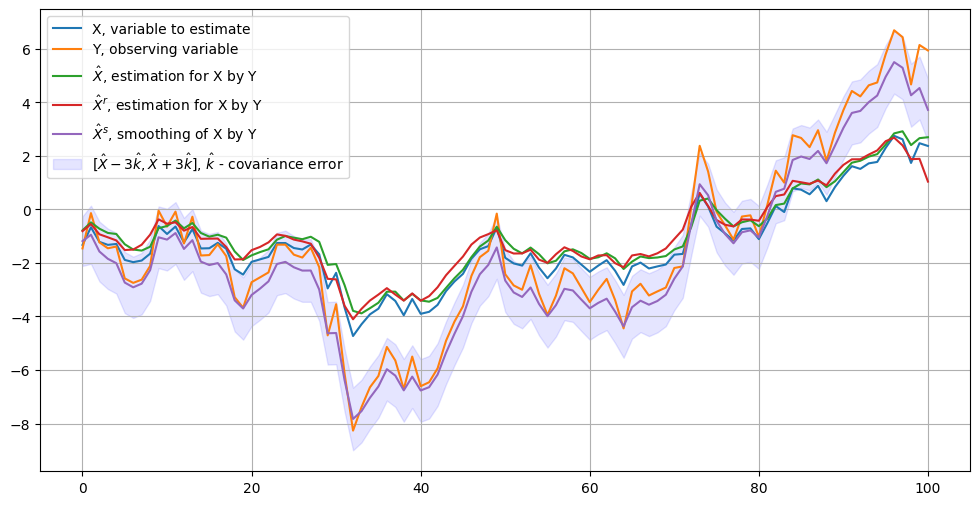

In [80]:
plt.figure(figsize=(12, 6))
plt.grid(True)

t = LGS.time_list
cov_est = LGS.smooth_cov_list
plt.plot(t, x, label='X, variable to estimate')
plt.plot(t, y, label='Y, observing variable')
plt.plot(t, x_est, label="$\hat{X}$, estimation for X by Y")
plt.plot(t, x_r_est, label="$\hat{X}^r$, estimation for X by Y")
plt.plot(t, x_smooth, label="$\hat{X}^s$, smoothing of X by Y ")

plt.fill_between(t, np.array(x_smooth) +  3 *  np.array(cov_est) ** 0.5,
                 np.array(x_smooth) -  3 * np.array(cov_est) ** 0.5, color='blue',
                 alpha= 0.1, label='[$\hat{X} - 3 \hat{k}, \hat{X} + 3 \hat{k}$], $\hat{k}$ - covariance error' )

plt.legend()

## Results

Smoothing algorithm for Linear Gaussian systems is really quick and efficient, but it requires Kalman and reverse Kalman filter